In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data olah covid - Tugas Mengolah dan Menganalisis Data Covid-19 di United Kingdom.csv")

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:
df.shape

(76411, 59)

In [5]:
df["location"].value_counts()

location
Argentina                   446
Mexico                      446
Thailand                    443
Peru                        434
Taiwan                      431
                           ... 
Greenland                    34
Montserrat                   31
Turks and Caicos Islands     30
Falkland Islands             16
Northern Cyprus               9
Name: count, Length: 215, dtype: int64

In [6]:
# Filtering Data United Kingdom
df_ina = df.loc[df["location"] == "United Kingdom"]

In [7]:
df_ina

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
72007,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
72008,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
72009,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
72010,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
72011,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72418,GBR,Europe,United Kingdom,2021-03-17,4287996.0,5793.0,5731.000,126068.0,141.0,120.857,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
72419,GBR,Europe,United Kingdom,2021-03-18,4294328.0,6332.0,5659.143,126163.0,95.0,108.571,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
72420,GBR,Europe,United Kingdom,2021-03-19,4299200.0,4872.0,5400.286,126263.0,100.0,97.714,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
72421,GBR,Europe,United Kingdom,2021-03-20,4304839.0,5639.0,5403.429,126359.0,96.0,94.000,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932


In [19]:
df_ina = df_ina.reset_index(drop = True)

In [20]:
df_ina.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
1,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
2,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
3,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
4,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932


In [21]:
df_ina.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
411,GBR,Europe,United Kingdom,2021-03-17,4287996.0,5793.0,5731.000,126068.0,141.0,120.857,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
412,GBR,Europe,United Kingdom,2021-03-18,4294328.0,6332.0,5659.143,126163.0,95.0,108.571,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
413,GBR,Europe,United Kingdom,2021-03-19,4299200.0,4872.0,5400.286,126263.0,100.0,97.714,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
414,GBR,Europe,United Kingdom,2021-03-20,4304839.0,5639.0,5403.429,126359.0,96.0,94.000,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
415,GBR,Europe,United Kingdom,2021-03-21,4310195.0,5356.0,5497.857,126393.0,34.0,91.429,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932


In [22]:
df_ina.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [23]:
df_ina=df_ina[['date','total_cases','new_cases','total_deaths', 'new_deaths',]]

In [24]:
df_ina

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-01-31,2.0,2.0,NaN,NaN
1,2020-02-01,2.0,0.0,NaN,NaN
2,2020-02-02,2.0,0.0,NaN,NaN
3,2020-02-03,8.0,6.0,NaN,NaN
4,2020-02-04,8.0,0.0,NaN,NaN
...,...,...,...,...,...
411,2021-03-17,4287996.0,5793.0,126068.0,141.0
412,2021-03-18,4294328.0,6332.0,126163.0,95.0
413,2021-03-19,4299200.0,4872.0,126263.0,100.0
414,2021-03-20,4304839.0,5639.0,126359.0,96.0


In [25]:
df_ina.fillna(0)

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-01-31,2.0,2.0,0.0,0.0
1,2020-02-01,2.0,0.0,0.0,0.0
2,2020-02-02,2.0,0.0,0.0,0.0
3,2020-02-03,8.0,6.0,0.0,0.0
4,2020-02-04,8.0,0.0,0.0,0.0
...,...,...,...,...,...
411,2021-03-17,4287996.0,5793.0,126068.0,141.0
412,2021-03-18,4294328.0,6332.0,126163.0,95.0
413,2021-03-19,4299200.0,4872.0,126263.0,100.0
414,2021-03-20,4304839.0,5639.0,126359.0,96.0


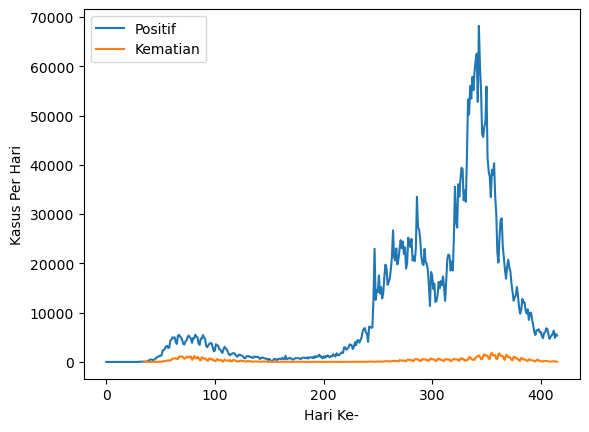

In [26]:
df_ina["new_cases"]
df_ina["new_deaths"]

plt.plot(df_ina["new_cases"], label = "Positif")
plt.plot(df_ina["new_deaths"], label ="Kematian")
plt.xlabel("Hari Ke-")
plt.ylabel("Kasus Per Hari")
plt.legend()
plt.show()

In [27]:
df_ina["new_cases"].max()

68192.0

In [28]:
for i in range(len(df_ina)): 
    if df_ina['new_cases'].iloc[i] == df_ina['new_cases'].max(): 
        print("Highest Case in Indonesia",df_ina['date'].iloc[i]) 
        print("With", df_ina['new_cases'].iloc[i], "New Cases")

Highest Case in Indonesia 2021-01-08
With 68192.0 New Cases


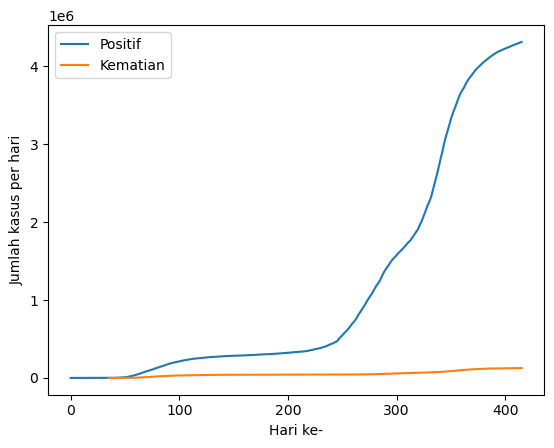

In [29]:
df_ina['total_cases'].plot(label='Positif') 
df_ina['total_deaths'].plot(label='Kematian') 
plt.xlabel('Hari ke-') 
plt.ylabel('Jumlah kasus per hari') 
plt.legend(loc='best') 
plt.show()

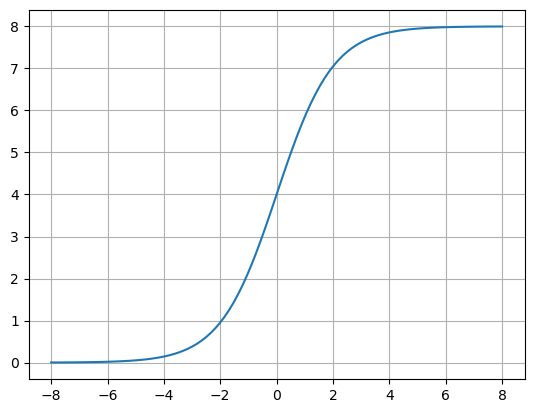

In [30]:
puncak=8
x=np.linspace(-8,8,100)
y=puncak/(1+np.exp(-x))
plt.plot(x, y, label='Sigmoid')
plt.grid()
plt.show()

In [31]:
def kurva_sigmoid(t,a,t0,c): 
    return c/(1+np.exp(-(t-t0)/(a))) 

In [32]:
x=list(df_ina.index) 
y=list(df_ina['total_cases'])

In [45]:
from scipy.optimize import curve_fit, fsolve

In [46]:
fit = curve_fit(kurva_sigmoid , x, y, method = 'lm')

In [52]:
varA, varB = fit

In [53]:
varA

array([4.22403835e+01, 3.34754337e+02, 5.26874727e+06])

In [54]:
varB

array([[7.56198288e-01, 1.28580624e+00, 6.25661091e+04],
       [1.28580624e+00, 3.08788771e+00, 1.42603847e+05],
       [6.25661091e+04, 1.42603847e+05, 7.07041135e+09]])

In [55]:
std_er=np.zeros(len(varA)) 
for i in range(len(varA)): 
    std_er[i]=np.sqrt(varB[i][i])

In [56]:
std_er

array([8.69596623e-01, 1.75723866e+00, 8.40857381e+04])

In [57]:
a  = varA[0] + std_er[0]
t0 = varA[1] + std_er[1]
c = varA[2] + std_er[2]

In [58]:
def puncak(x): 
 return kurva_sigmoid(x,a,t0,c)-int(c)

In [61]:
solusi = fsolve(puncak, t0)

In [63]:
n_puncak = int(solusi[0])

In [64]:
print("Nilai n_puncak:", n_puncak)

Nilai n_puncak: 1232


In [65]:
n_0=max(x)+1
pred_x=list(range(n_0,n_puncak))

In [66]:
print("Kita memiliki {} hari menuju puncak wabah".format(str(len(pred_x))))

Kita memiliki 816 hari menuju puncak wabah


In [67]:
pred_y=np.zeros(len(x+pred_x)) 
for i in range(n_puncak): 
 pred_y[i]=kurva_sigmoid(i,a,t0,c)

In [68]:
pred_y

array([2.17948440e+03, 2.23061038e+03, 2.28293517e+03, ...,
       5.35283300e+06, 5.35283300e+06, 5.35283300e+06])

In [69]:
print("Prediksi jumlah puncak {} orang".format(int(pred_y[-1])))

Prediksi jumlah puncak 5352832 orang


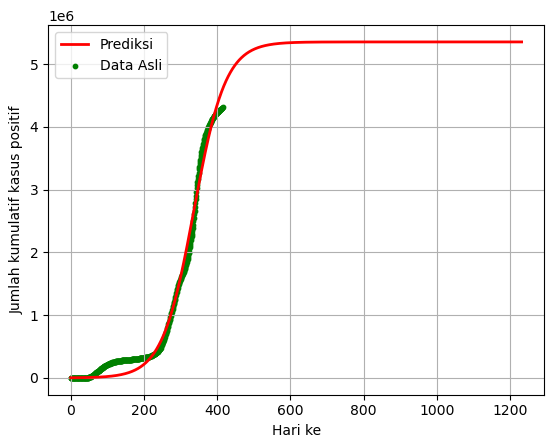

In [85]:
plt.plot(x+pred_x,pred_y,linewidth=2.0,label='Prediksi', color="red") 
plt.scatter(x, y, label='Data Asli', s=10, color='green') 
plt.xlabel('Hari ke') 
plt.ylabel('Jumlah kumulatif kasus positif') 
plt.grid() 
plt.legend(loc='best') 
plt.show() 

In [71]:
# Calculate R2 score
def calculate_r2(y_actual,y_pred,x): 
    SSR=sum((y_actual-y_pred[0:len(x)] )**2)
    SST=sum((y_actual- np.mean(y))**2)
    r = 1-(SSR/SST)
    return r

In [72]:
akur = calculate_r2(y, pred_y, x)
akur

0.9892448385269139

In [73]:
from datetime import datetime, timedelta
df_ina.head()

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-01-31,2.0,2.0,NaN,NaN
1,2020-02-01,2.0,0.0,NaN,NaN
2,2020-02-02,2.0,0.0,NaN,NaN
3,2020-02-03,8.0,6.0,NaN,NaN
4,2020-02-04,8.0,0.0,NaN,NaN


In [74]:
fmt='%Y-%m-%d'
n1=df_ina['date'][0] 
tgl_0=datetime.strptime(n1,fmt) 
print(tgl_0)

2020-01-31 00:00:00


In [75]:
type(tgl_0)

datetime.datetime

In [76]:
tgl_puncak=tgl_0+timedelta(days=n_puncak) 
print(tgl_puncak)

2023-06-16 00:00:00


In [77]:
h_puncak=tgl_puncak.strftime(fmt) 
print(h_puncak)

2023-06-16


In [78]:
type(h_puncak)

str

In [80]:
df_ina['total_pred']=pred_y[0:len(x)].astype(int) 
df_ina['selisih']=abs(df_ina['total_pred']-df_ina['total_cases']) 
df_ina=df_ina[['date','new_cases','total_deaths', 'new_deaths', 'total_cases', 'total_pred', 'selisih']]
df_ina.tail(20)

,date,new_cases,total_deaths,new_deaths,total_cases,total_pred,selisih
396,2021-03-02,6411.0,123530.0,343.0,4200700.0,4276798,76098.0
397,2021-03-03,6420.0,124017.0,487.0,4207120.0,4296603,89483.0
398,2021-03-04,6644.0,124259.0,242.0,4213764.0,4316131,102367.0
399,2021-03-05,6024.0,124495.0,236.0,4219788.0,4335384,115596.0
400,2021-03-06,6118.0,124654.0,159.0,4225906.0,4354362,128456.0
401,2021-03-07,5260.0,124736.0,82.0,4231166.0,4373065,141899.0
402,2021-03-08,4823.0,124801.0,65.0,4235989.0,4391496,155507.0
403,2021-03-09,5869.0,125032.0,231.0,4241858.0,4409655,167797.0
404,2021-03-10,6021.0,125222.0,190.0,4247879.0,4427544,179665.0
405,2021-03-11,6835.0,125403.0,181.0,4254714.0,4445162,190448.0


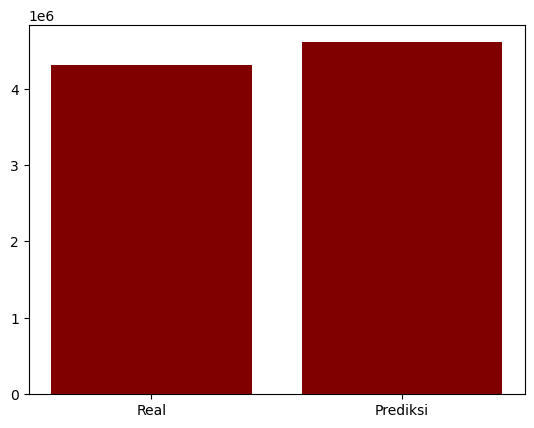

In [83]:
label=['Real','Prediksi'] 
value=[df_ina['total_cases'].iloc[-1], df_ina['total_pred'].iloc[-1]]
plt.bar(label,value, color="maroon") 
plt.show()

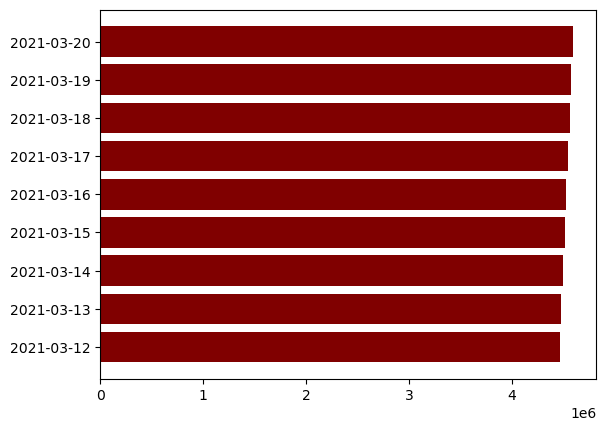

In [84]:
label=np.array(df_ina['date'].iloc[-10:-1], dtype=str) 
value=np.array(df_ina['total_pred'].iloc[-10:-1], dtype=int) 
plt.barh(label,value, color ="maroon") 
plt.show()